In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import seaborn as sns


In [37]:
df_train = pd.read_csv('train.csv')

In [38]:
df_train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Clean Data


In [39]:
# Loại bỏ nhiều cột và lưu vào DataFrame
df_train = df_train.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])



In [40]:
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
null_percentage = df_train['Age'].isnull().mean() * 100

print(f"Phần trăm giá trị null trong cột 'Age': {null_percentage:.2f}%")

Phần trăm giá trị null trong cột 'Age': 19.87%


In [42]:
# Lấy cột Age và lưu vào biến
age = df_train['Age']
age.head(5)


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

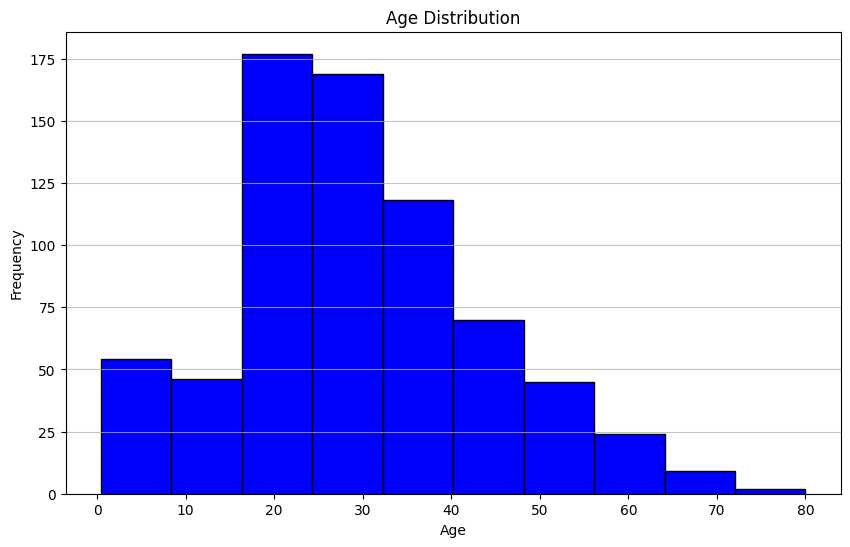

In [43]:
# Vẽ histogram cho cột Age
plt.figure(figsize=(10, 6))  # Thiết lập kích thước của biểu đồ
plt.hist(age, bins=10, color='blue', edgecolor='black')  # Vẽ histogram
plt.title('Age Distribution')  # Tiêu đề
plt.xlabel('Age')  # Nhãn trục x
plt.ylabel('Frequency')  # Nhãn trục y
plt.grid(axis='y', alpha=0.75)  # Thêm lưới cho trục y
plt.show()  # Hiển thị biểu đồ


In [44]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [45]:
# Giả sử dữ liệu của bạn được lưu trong DataFrame có tên là 'df'

# Tìm giá trị xuất hiện nhiều nhất trong cột 'Embarked'
most_frequent_value = df_train['Embarked'].mode()[0]
# Thay thế các giá trị null trong cột 'Embarked' bằng giá trị xuất hiện nhiều nhất
df_train['Embarked'].fillna(most_frequent_value, inplace=True)

# Kiểm tra kết quả
print(df_train['Embarked'].value_counts())



Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_26636\4276474215.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(most_frequent_value, inplace=True)


##one-hot-encoding


In [46]:
df_train = pd.get_dummies(df_train, columns=['Sex'], dtype=int)
df_train = pd.get_dummies(df_train, columns=['Embarked'], dtype=int)

In [47]:
df_train.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,1,0,0


SPIT DATA 

In [48]:
df_X_train = df_train.drop('Survived', axis=1)
df_y_train = df_train['Survived']

In [49]:
df_y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
df_X_train.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [51]:
scaler = StandardScaler()
df_X_norm = scaler.fit_transform(df_X_train)

In [52]:
# Chia dữ liệu thành X_train (80%) và temp (20%)
X_train, X_test, y_train, y_test = train_test_split(df_X_norm, df_y_train, test_size=0.2, random_state=42)


In [53]:

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_train_pred = lr_model.predict(X_train)

In [55]:


accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set using Logistic Regresstion: {accuracy:.5f}')


Accuracy on training set using Logistic Regresstion: 0.80197


In [56]:
y_test_pred = lr_model.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test set using Logistic Regresstion: {accuracy:.5f}')

Accuracy on test set using Logistic Regresstion: 0.81006


In [ ]:
xg_model = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    min_child_weight= 12  # overfitinging
)
xg_model.fit(X_train, y_train)


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=12, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [59]:
y_xg_train_pred = xg_model.predict(X_train)
accuracy_xgtrain = accuracy_score(y_train, y_xg_train_pred)
print(f'Accuracy on training set using XGBoost: {accuracy_xgtrain:.5f}')

Accuracy on training set using XGBoost: 0.88062


In [60]:
y_xg_test_pred = xg_model.predict(X_test)
accuracy_xgtest = accuracy_score(y_test, y_xg_test_pred)
print(f'Accuracy on test set using XGBoost: {accuracy_xgtest:.5f}')

Accuracy on test set using XGBoost: 0.84916


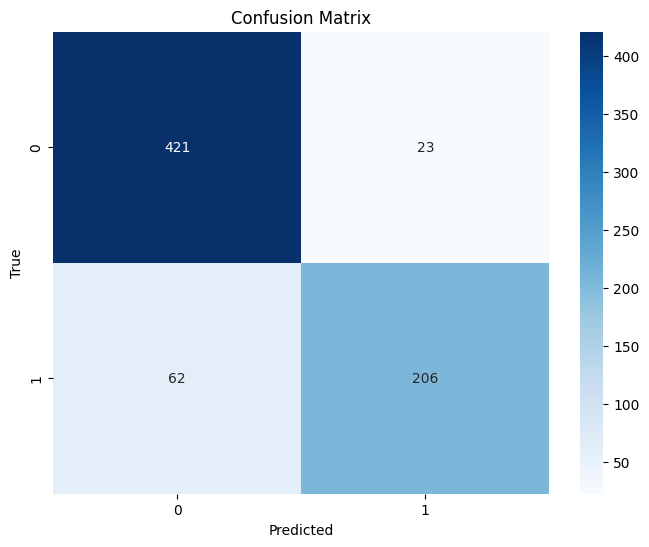

In [61]:
conf_matrix_xgboost = confusion_matrix(y_train, y_xg_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [62]:
report = classification_report(y_test, y_xg_test_pred)

In [63]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [64]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, alpha=0.1)
# Huấn luyện mô hình
mlp_model.fit(X_train, y_train)

MLPClassifier(alpha=0.1, max_iter=1000, random_state=42)

In [65]:
y_pred_trainNN = mlp_model.predict(X_train)
accuracy_NNtrain = accuracy_score(y_train, y_pred_trainNN )
print(f'Accuracy on training set using Neural Network: {accuracy_NNtrain:.5f}')

Accuracy on training set using Neural Network: 0.85815


In [66]:
y_pred_testNN = mlp_model.predict(X_test)
accuracy_NNtest = accuracy_score(y_test, y_pred_testNN)
print(f'Accuracy on test set using Neural Network: {accuracy_NNtest:.5f}')

Accuracy on test set using Neural Network: 0.83240
